# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from operator import itemgetter

dfCounting16 = pd.read_csv("CleanData/countingClean-PC16.csv")
dfRead16 = pd.read_csv("CleanData/readCSVClean-PC16.csv")

dfCounting16.head()


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,1.876892,1.619263,0.113342,195.949,62.0,best,25000
1,1.891479,1.635620,0.111633,196.755,62.0,best,25000
2,1.785217,1.534607,0.105225,200.035,62.0,best,25000
3,1.878052,1.621521,0.114441,192.267,62.0,best,25000
4,1.678101,1.440918,0.102600,184.385,62.0,best,25000


In [2]:
dfRead16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,2.240601,1.966187,0.134399,227.880,53.0,random1,25000
1,2.062317,1.775085,0.126160,250.212,53.0,random1,25000
2,2.140869,1.876709,0.121887,222.526,53.0,random1,25000
3,2.217102,1.940735,0.133545,226.620,53.0,random1,25000
4,2.058533,1.796814,0.119385,219.516,53.0,random1,25000


In [3]:
def calcMean(df,type,size):
    meandf = df[df["Input case"] == type][df["Size"]==size].mean()
    meandf["Input case"] = type
    return meandf

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    l = []
    for case in c:
        for size in s:
            l.append(calcMean(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

dfCountingMean16 = mean_of_dataset(dfCounting16)
dfCountingMean16.head()

C:\Users\langk\AppData\Local\Temp\ipykernel_25096\1889393369.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_25096\1889393369.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_25096\1889393369.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_25096\1889393369.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only v

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,1.81127,1.562821,0.107608,190.749068,62.575221,25000.0,best
1,2.26661,1.960228,0.134846,232.987868,65.919355,50000.0,best
2,2.679611,2.324276,0.159612,267.013979,68.02139,75000.0,best
3,3.047013,2.647517,0.180083,297.52729,69.212766,100000.0,best
4,4.039604,3.507915,0.232092,387.379144,70.858333,200000.0,best


In [4]:
def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def mean_of_dataset_readCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(calcMean(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans

dfReadMean16 = mean_of_dataset_readCSV(dfRead16)
dfReadMean16.head()

C:\Users\langk\AppData\Local\Temp\ipykernel_25096\1889393369.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_25096\1889393369.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_25096\1889393369.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_25096\1889393369.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only v

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,2.149151,1.873956,0.12836,231.807079,53.973684,25000.0,random1
1,2.519434,2.185134,0.150334,264.781167,57.0,50000.0,random1
2,3.059938,2.668515,0.178193,304.554189,61.0,75000.0,random1
3,3.524851,3.07726,0.205626,343.570833,63.527778,100000.0,random1
4,4.166064,3.626851,0.233299,420.754475,65.425,200000.0,random1


In [5]:
# meanC6 = meanC6.reset_index(drop=True)
# meanC21 = meanC21.reset_index(drop=True)
# meanC23 = meanC23.reset_index(drop=True)
# meanR6 = meanR6.reset_index(drop=True)
# meanR21 = meanR21.reset_index(drop=True)
# meanR23 = meanR23.reset_index(drop=True)
meanC16 = dfCountingMean16.reset_index(drop=True)
meanR16 = dfReadMean16.reset_index(drop=True)
meanC16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,1.81127,1.562821,0.107608,190.749068,62.575221,25000.0,best
1,2.26661,1.960228,0.134846,232.987868,65.919355,50000.0,best
2,2.679611,2.324276,0.159612,267.013979,68.02139,75000.0,best
3,3.047013,2.647517,0.180083,297.52729,69.212766,100000.0,best
4,4.039604,3.507915,0.232092,387.379144,70.858333,200000.0,best


In [6]:
def deductReadFromAlg(meanC, meanR):
    lc = []
    lt = []
    lm = []

    for i in range(len(meanC["Size"])):
        case = meanC["Input case"][i]
        size = meanC["Size"][i]
        if case == "best":
                case2 = "countingbest"
        if case == "worst":
            case2 = "countingworst"
        if case.startswith("random"):
            case2 = "countingrandom"+case.split("m")[-1]

        Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
        Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lc.append(Cc-Rc)

        Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
        Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lt.append(Ct-Rt)

        Cm = meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        Rm = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        lm.append(Cm-Rm)

    meanC["CPU - readCSV"] = lc
    meanC["Time - readCSV"] = lt
    meanC["Memory - readCSV"] = lm


deductReadFromAlg(dfCountingMean16, dfReadMean16)



C:\Users\langk\AppData\Local\Temp\ipykernel_25096\2795501577.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_25096\2795501577.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_25096\2795501577.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_25096\2795501577.py:21: UserWarning: B

# PLOTS

In [7]:
# For bubblesort: polynomial regression
def polyReg(SeriesX, SeriesY,dg, Label, color, plotLabel = True, regLine=True, printR2Score = True, plotGraph = True, dots="o"):
    X = SeriesX.values.reshape(SeriesX.size, -1)
    y = SeriesY.values

    fitness = []
   #for dg in range(minDegrees, maxDegrees):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  
    
    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    
    r2 = metrics.r2_score(y,y_poly)
    #if printR2Score:
    #    print(f"r2_score for {Label} {dg} is: {r2}")
    fitness.append((f"poly {dg}dg", r2, y_poly))
    #print(f"Parameters of poly: {poly_reg.get_params()}") #does not give what we are looking for
    
    if plotGraph:
        plt.plot(X, y,dots, color=color,markersize=10)
        if regLine:
            plt.plot(X, y_poly, color=color, linewidth=2)
        #plt.legend(loc='upper left')
    #print(lr_2.intercept_, lr_2.coef_)
    return max(fitness,key=itemgetter(1))

In [8]:
def getIndex(df,case,size):
    return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]

In [9]:
def calcPercent(df):
    cpuPercent = []
    pkgPercent = []
    fullEC = []
    for case in ["best", "worst", "random"]:
        if case != "random":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                cpuPercent.append(df["CPU - readCSV"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
        else :
            for i in range(1,11):
                for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                    cpuPercent.append(df["CPU (J)"][getIndex(df,case+str(i),size)] / df["PKG (J)"][getIndex(df,case+str(i),size)] * 100)
                    pkgPercent.append(100)
                    fullEC.append(df["CPU - readCSV"][getIndex(df,case+str(i),size)]+df["Memory - readCSV"][getIndex(df,case+str(i),size)])

    df["CPU % of PKG"] = cpuPercent
    df["PKG %"] = pkgPercent
    df["full EC"] = fullEC
calcPercent(dfCountingMean16)
dfCountingMean16.head()

C:\Users\langk\AppData\Local\Temp\ipykernel_25096\2661346545.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC
0,1.81127,1.562821,0.107608,190.749068,62.575221,25000.0,best,-0.016871,-5.900028,0.003551,-0.931430,100,-0.013320
1,2.26661,1.960228,0.134846,232.987868,65.919355,50000.0,best,-0.040826,0.472649,0.005520,-1.801192,100,-0.035306
2,2.679611,2.324276,0.159612,267.013979,68.02139,75000.0,best,-0.025936,3.338082,0.008183,-0.967903,100,-0.017753
3,3.047013,2.647517,0.180083,297.52729,69.212766,100000.0,best,0.020467,6.792713,0.012159,0.671698,100,0.032626
4,4.039604,3.507915,0.232092,387.379144,70.858333,200000.0,best,0.005928,6.566419,0.009570,0.146736,100,0.015497


In [10]:
dfCountingMean16.to_csv("countingFinalData-PC16.csv", sep=",", index=False)

random0 R2 0.8678667290186859  

random1 R2 0.7020124624585075  

random2 R2 0.7756367235360994  

random3 R2 0.7581298265902678  

random4 R2 0.6607237655100011  

random5 R2 0.7761803274666388  

random6 R2 0.7634075676118647  

random7 R2 0.8596657054912201  

random8 R2 0.5916519088282115  

random9 R2 0.5916071007164905  

worst R2  0.7703667777849537 

best R2  0.5726295502438051 



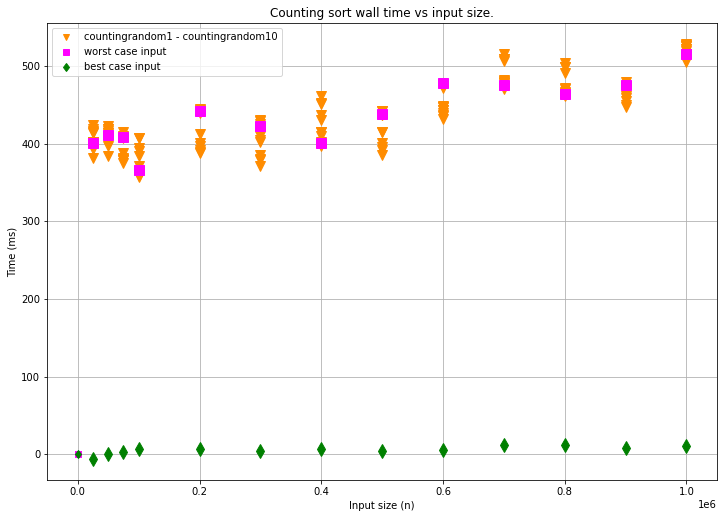

In [11]:
plt.figure(figsize=(10*1.2,7*1.2))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
plt.plot(0,0,"v", color="darkorange",label="countingrandom1 - countingrandom10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d",regLine=False)
plt.plot(0,0,"d", color="green",label="best case input")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Counting sort wall time vs input size.")
plt.xlabel("Input size (n)")
plt.ylabel("Time (ms)")
plt.grid()
plt.legend()
plt.show()


# SQ 2: Time vs bigO


random0 R2 0.8678667290186859  

random1 R2 0.7020124624585075  

random2 R2 0.7756367235360994  

random3 R2 0.7581298265902678  

random4 R2 0.6607237655100011  

random5 R2 0.7761803274666388  

random6 R2 0.7634075676118647  

random7 R2 0.8596657054912201  

random8 R2 0.5916519088282115  

random9 R2 0.5916071007164905  

worst R2  0.7703667777849537 



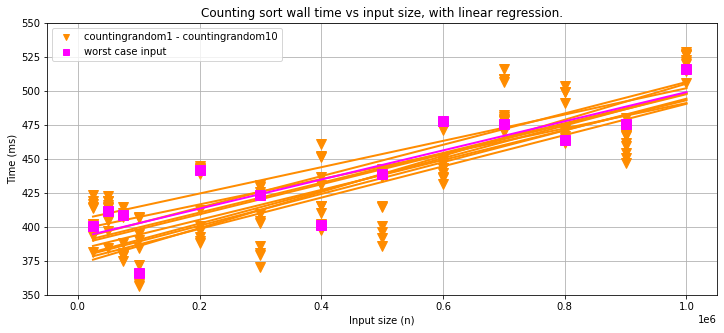

In [12]:
plt.figure(figsize=(10*1.2,5))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v"))
plt.plot(0,0,"v", color="darkorange",label="countingrandom1 - countingrandom10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d")
#plt.plot(0,0,"d", color="green",label="best case input")
print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")
plt.title("Counting sort wall time vs input size, with linear regression.")
plt.xlabel("Input size (n)")
plt.ylabel("Time (ms)")
plt.ylim(350, 550)
plt.grid()
plt.legend()
plt.show()


best R2  0.5726295502438051 



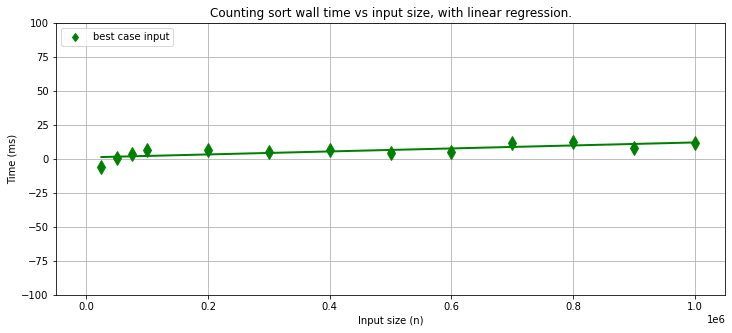

In [13]:
plt.figure(figsize=(10*1.2,5))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v"))
#plt.plot(0,-111110,"v", color="darkorange",label="countingrandom1 - countingrandom10")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s")
#plt.plot(0,-111110,"s", color="fuchsia",label="worst case input")
best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d")
plt.plot(0,-111110,"d", color="green",label="best case input")
#print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Counting sort wall time vs input size, with linear regression.")
plt.xlabel("Input size (n)")
plt.ylabel("Time (ms)")
plt.ylim(-100, 100)
plt.grid()
plt.legend(loc="upper left")
plt.show()


# EC vs Time

random0 R2 0.10213715079203267  

random1 R2 0.03867079513724481  

random2 R2 0.02358144128531925  

random3 R2 0.1851059383590058  

random4 R2 0.01668936158084744  

random5 R2 0.12261068402753073  

random6 R2 0.10317281065198658  

random7 R2 0.09349612080202185  

random8 R2 0.048544806122681416  

random9 R2 0.10455574489627961  



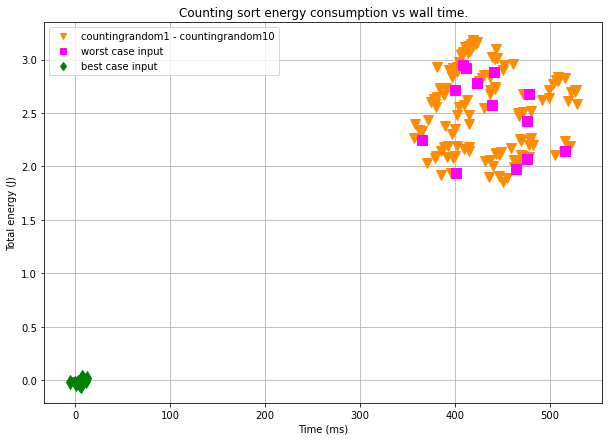

In [14]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v",regLine=False))
plt.plot(0,0,"v", color="darkorange",label="countingrandom1 - countingrandom10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
# print(f"worst R2 ", worst[1], "\n")
best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
plt.plot(0,0,"d", color="green",label="best case input")
#print(f"best R2 ", best[1], "\n")
plt.title("Counting sort energy consumption vs wall time.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.legend()
plt.grid()
plt.show()


random0 R2 0.10213715079203267  

random1 R2 0.03867079513724481  

random2 R2 0.02358144128531925  

random3 R2 0.1851059383590058  

random4 R2 0.01668936158084744  

random5 R2 0.12261068402753073  

random6 R2 0.10317281065198658  

random7 R2 0.09349612080202185  

random8 R2 0.048544806122681416  

random9 R2 0.10455574489627961  

worst R2  0.070013139017574 



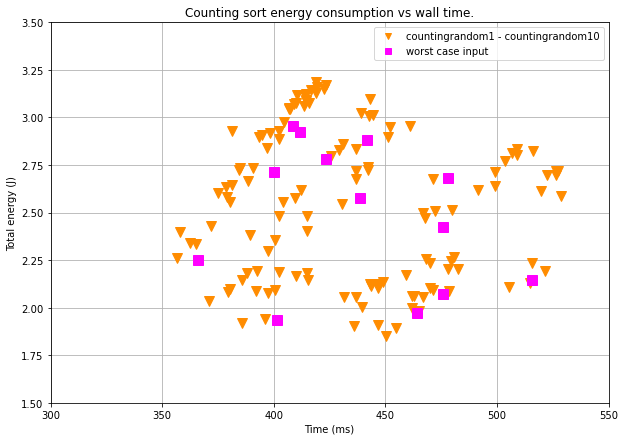

In [15]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v",regLine=False))
plt.plot(0,0,"v", color="darkorange",label="countingrandom1 - countingrandom10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
#plt.plot(0,0,"d", color="green",label="best case input")
# print(f"best R2 ", best[1], "\n")
plt.title("Counting sort energy consumption vs wall time.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.legend()
plt.xlim(300,550)
plt.ylim(1.5,3.5)
plt.grid()
plt.show()


best R2  0.16285101772098742 



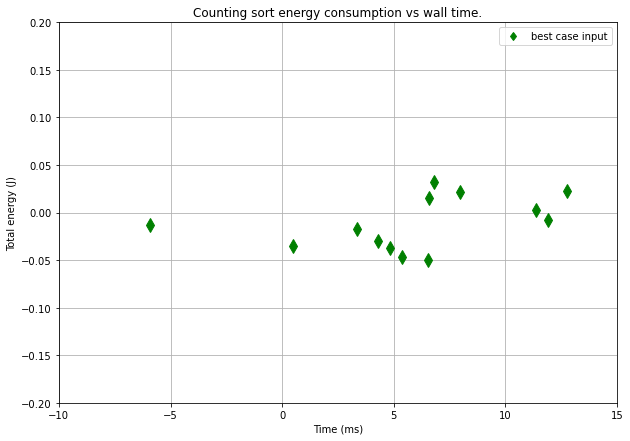

In [16]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

# for i in range(1,11):
#     Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v"))
# plt.plot(-1000000,0,"v", color="darkorange",label="random1 - random10")
# # for i in range(len(Rs)):
# #     print(f"random{i} R2", Rs[i][1], " \n")
# worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
# plt.plot(-100000,0,"s", color="fuchsia",label="worst case input")
# print(f"worst R2 ", worst[1], "\n")
best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
plt.plot(-1000000,0,"d", color="green",label="best case input")
print(f"best R2 ", best[1], "\n")
plt.title("Counting sort energy consumption vs wall time.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.legend()
plt.grid()
plt.xlim(-10,15)
plt.ylim(-.2,.2)
plt.show()


# EC vs big-oh

random0 R2 0.32039466734137756  

random1 R2 0.44615746951806856  

random2 R2 0.06702816646353726  

random3 R2 0.5414365851704135  

random4 R2 0.19711130784365882  

random5 R2 0.43632623124865444  

random6 R2 0.49505640253874317  

random7 R2 0.30311185122056883  

random8 R2 0.5934482229316622  

random9 R2 0.11192352959340779  

worst R2  0.3809721084084622 

best R2  0.04989827263985924 



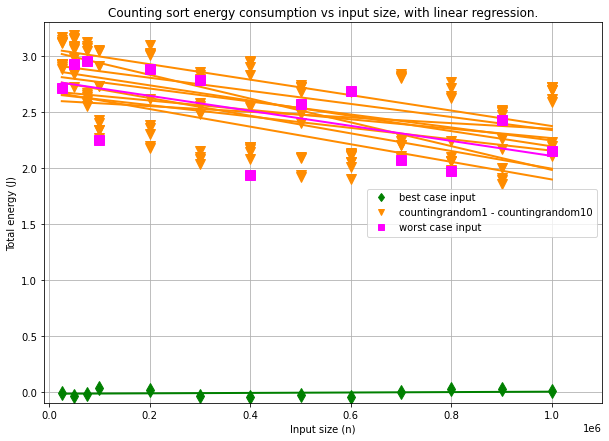

In [17]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d")
plt.plot(-10000,-10000,"d", color="green",label="best case input")
for i in range(1,11):
    Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v"))
plt.plot(-10000,-10000,"v", color="darkorange",label="countingrandom1 - countingrandom10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(-10000,-10000,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Counting sort energy consumption vs input size, with linear regression.")
plt.xlabel("Input size (n)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.xlim(-10000,1100000)
plt.ylim(-.1,3.3)

plt.legend()
plt.show()

random0 R2 0.32039466734137756  

random1 R2 0.44615746951806856  

random2 R2 0.06702816646353726  

random3 R2 0.5414365851704135  

random4 R2 0.19711130784365882  

random5 R2 0.43632623124865444  

random6 R2 0.49505640253874317  

random7 R2 0.30311185122056883  

random8 R2 0.5934482229316622  

random9 R2 0.11192352959340779  

worst R2  0.3809721084084622 

best R2  0.04989827263985924 



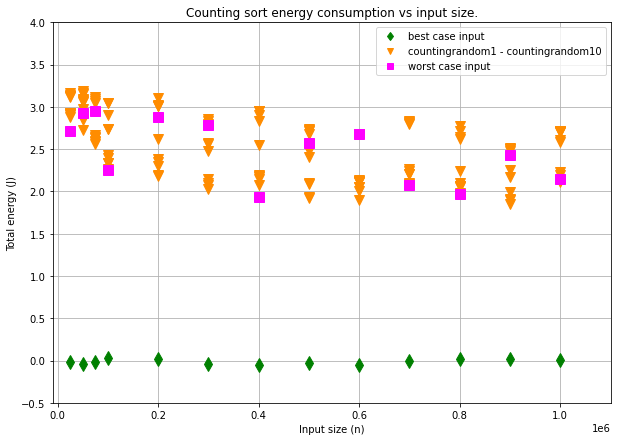

In [18]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
plt.plot(-10000,-10000,"d", color="green",label="best case input")
for i in range(1,11):
    Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
plt.plot(-10000,-10000,"v", color="darkorange",label="countingrandom1 - countingrandom10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
plt.plot(-10000,-10000,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Counting sort energy consumption vs input size.")
plt.xlabel("Input size (n)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.xlim(-10000,1100000)
plt.ylim(-.5,4)
plt.legend()
plt.show()

best R2  0.04989827263985924 



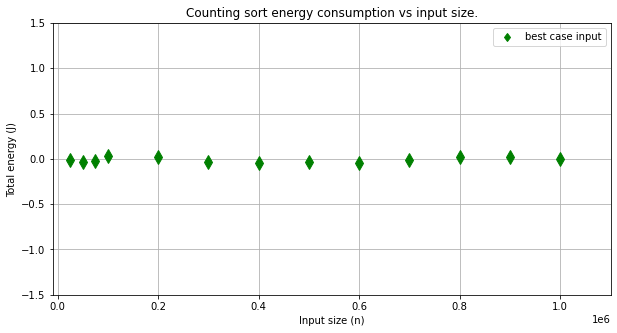

In [19]:
plt.figure(figsize=(10,5))
color = "red"
# plt.plot(-10000,-10000,"s", color="fuchsia",label="worst case input")
# plt.plot(-10000,-10000,"v", color="darkorange",label="countingrandom1 - countingrandom10")
plt.plot(-10000,-10000,"d", color="green",label="best case input")

Rs = []

best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
# for i in range(1,11):
#     Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
# print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Counting sort energy consumption vs input size.")
plt.xlabel("Input size (n)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.xlim(-10000,1100000)
plt.ylim(-1.5,1.5)

plt.legend()
plt.show()

random0 R2 0.32039466734137756  

random1 R2 0.44615746951806856  

random2 R2 0.06702816646353726  

random3 R2 0.5414365851704135  

random4 R2 0.19711130784365882  

random5 R2 0.43632623124865444  

random6 R2 0.49505640253874317  

random7 R2 0.30311185122056883  

random8 R2 0.5934482229316622  

random9 R2 0.11192352959340779  

worst R2  0.3809721084084622 



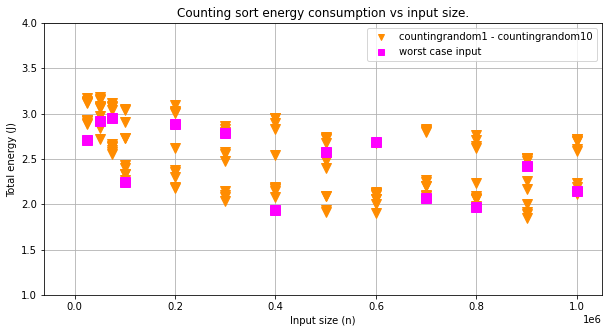

In [20]:
plt.figure(figsize=(10,5))
color = "red"

Rs = []
plt.plot(-10000,-10000,"v", color="darkorange",label="countingrandom1 - countingrandom10")
#plt.plot(-10000,-10000,"d", color="green",label="best case input")
plt.plot(-10000,-10000,"s", color="fuchsia",label="worst case input")

#best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
for i in range(1,11):
    Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")
plt.title("Counting sort energy consumption vs input size.")
plt.xlabel("Input size (n)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.xlim()
plt.ylim(1,4)
plt.legend()
plt.show()

In [21]:
import matplotlib.pyplot as plt
from scipy import stats
y = dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"]
x = dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Size"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)

print("LineReg: worst case r2 for bubble: ", metrics.r2_score(y,mymodel))
print("polyReg: worst case r2 for bubble: ", best[1])
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show() 

AttributeError: 'float' object has no attribute 'shape'